# Feature Tools
**Use Case:** \
Feature Tools automates feature engineering.

**Code Logic:**
* Initialize an Entity Set
* Add the relevant dataframe to the Entity Set

**Actionable Next Steps:** \
EDA \
Feature Selection \
Modeling 

**Notes:** \
It's best to ignore warnings when using feature tools. \
If you are working with multiple tables, go to section ["Adding a Relationship"](https://featuretools.alteryx.com/en/stable/getting_started/using_entitysets.html#Adding-a-Relationship) \
[Full documentation](https://featuretools.alteryx.com/en/stable/index.html)

In [ ]:
import featuretools as ft

es = ft.EntitySet(id="health")
es = es.add_dataframe(
    dataframe_name="cholesterol",
    dataframe=data2,
    index="Respondent",
)
es

Entityset: health
  DataFrames:
    cholesterol [Rows: 365, Columns: 15]
  Relationships:
    No relationships

# Visualizing Entity Set
**Use Case:** \
To understand the shape of the Entity Set. \
To identify what transformations / aggregations can be done.

**Actionable Next Steps:** \
Deep Feature Synthesis

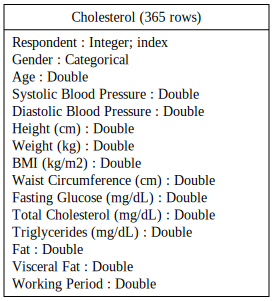

In [ ]:
es.plot()

# List Primitives
**Use Case:** \
Information regarding the different types of aggregation / transformation that can be done.

**Actionable Next Steps:** \
Deep Feature Synthesis

In [ ]:
ft.list_primitives()

,name,type,description,valid_inputs,return_type
0,any,aggregation,Determines if any value is 'True' in a list.,"<ColumnSchema (Logical Type = BooleanNullable)>, <ColumnSchema (Logical Type = Boolean)>",<ColumnSchema (Logical Type = Boolean)>
1,sum,aggregation,"Calculates the total addition, ignoring `NaN`.",<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
...,...,...,...,...,...
201,lag,transform,Shifts an array of values by a specified number of periods.,"<ColumnSchema (Semantic Tags = ['time_index'])>, <ColumnSchema (Logical Type = BooleanNullable)>, <ColumnSchema (Logical Type = Boolean)>, <ColumnSchema (Semantic Tags = ['numeric'])>, <ColumnSchema (Semantic Tags = ['category'])>",None
202,age,transform,Calculates the age in years as a floating point number given a date of birth.,<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['date_of_birth'])>,<ColumnSchema (Logical Type = AgeFractional) (Semantic Tags = ['numeric'])>


# Deep Feature Synthesis
**Use Case:** \
Generates many new features that could provide valuable insights \

**Code Logic:**
* Pass the relevant entity set
* Pass the name of the relevant dataframe
* Pass the transform primitives you want to generate
* You can preview the names of the generated features through the parameter `features_only`
* Pass the max depth

**Actionable Next Steps:** \
EDA \
Feature Selection \
Modeling 

**Notes:** \
In the example provided, we are only working with one dataframe, therefore we do not need to pass aggregate primitives. \
Max depth also does not affect the features generated if you are only working with one dataframe.
If you want to stack the generated primitives, you can either:
* Run DFS again with the newly generated features
* [Stack Overflow solution that is worth looking into](https://stackoverflow.com/questions/65448806/deep-feature-synthesis-depth-for-transformation-primitives-featuretools/65470819#65470819)

In [ ]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="Cholesterol",
    trans_primitives=["multiply_numeric","divide_numeric"],
    features_only=False,
    max_depth=1,
)
feature_matrix

,Gender,Age,Systolic Blood Pressure,Diastolic Blood Pressure,Height (cm),Weight (kg),BMI (kg/m2),Waist Circumference (cm),Fasting Glucose (mg/dL),Total Cholesterol (mg/dL),Triglycerides (mg/dL),Fat,Visceral Fat,Working Period,Age / BMI (kg/m2),Age / Diastolic Blood Pressure,Age / Fasting Glucose (mg/dL),Age / Fat,Age / Height (cm),Age / Systolic Blood Pressure,Age / Total Cholesterol (mg/dL),Age / Triglycerides (mg/dL),Age / Visceral Fat,Age / Waist Circumference (cm),Age / Weight (kg),Age / Working Period,BMI (kg/m2) / Age,BMI (kg/m2) / Diastolic Blood Pressure,BMI (kg/m2) / Fasting Glucose (mg/dL),BMI (kg/m2) / Fat,BMI (kg/m2) / Height (cm),BMI (kg/m2) / Systolic Blood Pressure,BMI (kg/m2) / Total Cholesterol (mg/dL),BMI (kg/m2) / Triglycerides (mg/dL),BMI (kg/m2) / Visceral Fat,BMI (kg/m2) / Waist Circumference (cm),BMI (kg/m2) / Weight (kg),BMI (kg/m2) / Working Period,Diastolic Blood Pressure / Age,Diastolic Blood Pressure / BMI (kg/m2),Diastolic Blood Pressure / Fasting Glucose (mg/dL),Diastolic Blood Pressure / Fat,Diastolic Blood Pressure / Height (cm),Diastolic Blood Pressure / Systolic Blood Pressure,Diastolic Blood Pressure / Total Cholesterol (mg/dL),Diastolic Blood Pressure / Triglycerides (mg/dL),Diastolic Blood Pressure / Visceral Fat,Diastolic Blood Pressure / Waist Circumference (cm),Diastolic Blood Pressure / Weight (kg),Diastolic Blood Pressure / Working Period,Fasting Glucose (mg/dL) / Age,Fasting Glucose (mg/dL) / BMI (kg/m2),Fasting Glucose (mg/dL) / Diastolic Blood Pressure,Fasting Glucose (mg/dL) / Fat,Fasting Glucose (mg/dL) / Height (cm),Fasting Glucose (mg/dL) / Systolic Blood Pressure,Fasting Glucose (mg/dL) / Total Cholesterol (mg/dL),Fasting Glucose (mg/dL) / Triglycerides (mg/dL),Fasting Glucose (mg/dL) / Visceral Fat,Fasting Glucose (mg/dL) / Waist Circumference (cm),Fasting Glucose (mg/dL) / Weight (kg),Fasting Glucose (mg/dL) / Working Period,Fat / Age,Fat / BMI (kg/m2),Fat / Diastolic Blood Pressure,Fat / Fasting Glucose (mg/dL),Fat / Height (cm),Fat / Systolic Blood Pressure,Fat / Total Cholesterol (mg/dL),Fat / Triglycerides (mg/dL),Fat / Visceral Fat,Fat / Waist Circumference (cm),Fat / Weight (kg),Fat / Working Period,Height (cm) / Age,Height (cm) / BMI (kg/m2),Height (cm) / Diastolic Blood Pressure,Height (cm) / Fasting Glucose (mg/dL),Height (cm) / Fat,Height (cm) / Systolic Blood Pressure,Height (cm) / Total Cholesterol (mg/dL),Height (cm) / Triglycerides (mg/dL),Height (cm) / Visceral Fat,Height (cm) / Waist Circumference (cm),Height (cm) / Weight (kg),Height (cm) / Working Period,Systolic Blood Pressure / Age,Systolic Blood Pressure / BMI (kg/m2),Systolic Blood Pressure / Diastolic Blood Pressure,Systolic Blood Pressure / Fasting Glucose (mg/dL),Systolic Blood Pressure / Fat,Systolic Blood Pressure / Height (cm),Systolic Blood Pressure / Total Cholesterol (mg/dL),Systolic Blood Pressure / Triglycerides (mg/dL),Systolic Blood Pressure / Visceral Fat,Systolic Blood Pressure / Waist Circumference (cm),Systolic Blood Pressure / Weight (kg),Systolic Blood Pressure / Working Period,Total Cholesterol (mg/dL) / Age,Total Cholesterol (mg/dL) / BMI (kg/m2),Total Cholesterol (mg/dL) / Diastolic Blood Pressure,Total Cholesterol (mg/dL) / Fasting Glucose (mg/dL),Total Cholesterol (mg/dL) / Fat,Total Cholesterol (mg/dL) / Height (cm),Total Cholesterol (mg/dL) / Systolic Blood Pressure,Total Cholesterol (mg/dL) / Triglycerides (mg/dL),Total Cholesterol (mg/dL) / Visceral Fat,Total Cholesterol (mg/dL) / Waist Circumference (cm),Total Cholesterol (mg/dL) / Weight (kg),Total Cholesterol (mg/dL) / Working Period,Triglycerides (mg/dL) / Age,Triglycerides (mg/dL) / BMI (kg/m2),Triglycerides (mg/dL) / Diastolic Blood Pressure,Triglycerides (mg/dL) / Fasting Glucose (mg/dL),Triglycerides (mg/dL) / Fat,Triglycerides (mg/dL) / Height (cm),Triglycerides (mg/dL) / Systolic Blood Pressure,Triglycerides (mg/dL) / Total Cholesterol (mg/dL),Triglycerides (mg/dL) / Visceral Fat,Triglycerides (mg/dL) / Waist Circumf